## EDA and Salary prediction using ML models of DataScience Employees

## Introduction
The purpose of this analysis is to examine multiple factors and their complex interrelationships to accurately predict wage outcomes. This study strives to furnish invaluable insights into the current salary trajectories in the realm of data science, simultaneously laying a robust foundation for future explorations into the impact of key determinants like experience level, employment type and company size on the wage structures within this swiftly advancing profession.

## Importing Libraries

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [263]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")


In [264]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Top 20 values

In [265]:
df.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


## Exploratory Data Analysis (EDA):

In [266]:
df.shape

(3755, 11)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [268]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [269]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [270]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [271]:
# check the missing values in the data
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values in the dataset

In [272]:
#Unique values in the dataset 
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

###### There are 4 categorical values in the column "experience_level", such as:

* EN, which is Entry-level.
* MI, which is Mid-level.
* SE, which is Senior-level.
* EX, which is Executive-level.


###### There are 3 categorical values in the column "remote_ratio", such as:

* 100, which is Remotely.
* 0, which is On-site.
* 50, which is Hybrid.

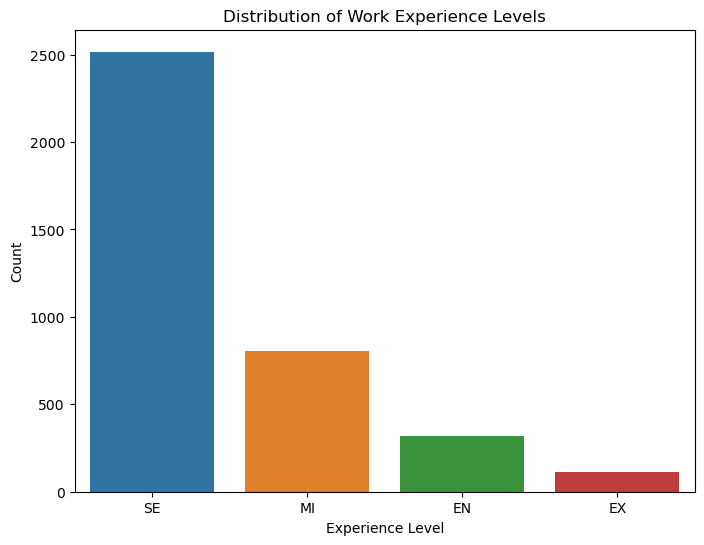

In [273]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='experience_level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Work Experience Levels')
plt.show()

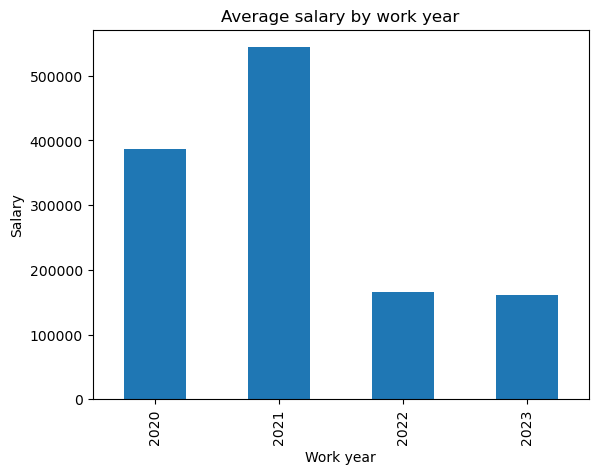

In [274]:
# Group the data by work year
df1 = df.groupby("work_year")["salary"].mean()

# Plot the average salary by work year
df1.plot(kind="bar")

# Add a title and labels
plt.title("Average salary by work year")
plt.xlabel("Work year")
plt.ylabel("Salary")

# Show the plot
plt.show()

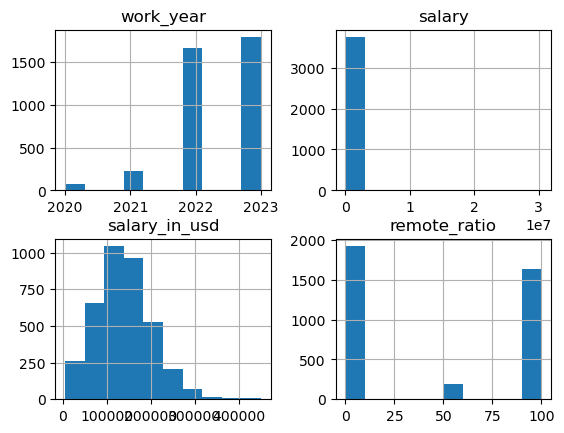

In [275]:
df.hist()
plt.show()

#### experience_level
EN, which refers to Entry-level / Junior.

MI, which refers to Mid-level / Intermediate.

SE, which refers to Senior-level / Expert.

EX, which refers to Executive-level / Director.

In [276]:
print("Total value counts of the roles:-\n ",df["experience_level"].value_counts())

Total value counts of the roles:-
  SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


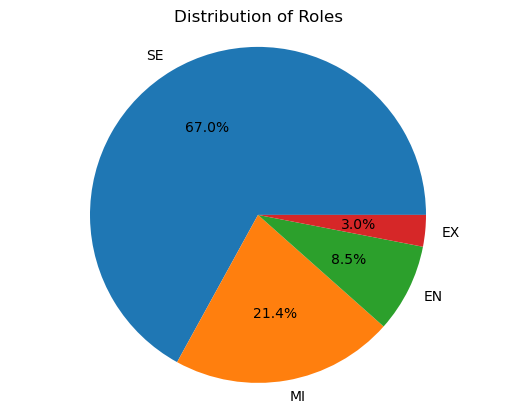

In [277]:
roles = ["SE", "MI", "EN", "EX"]
people = [2516, 805, 320, 114]

plt.pie(people, labels=roles, autopct='%1.1f%%')
plt.title('Distribution of Roles')
plt.axis('equal')
plt.show()

In [278]:
print(df["employment_type"].value_counts())

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64


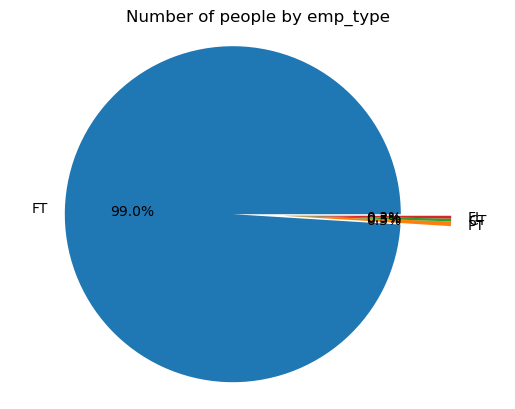

In [279]:
types=["FT","PT","CT","FL"]
no_people=[3718,17,10,10]
plt.pie(no_people, labels=types, autopct='%1.1f%%',explode = [0.3, 0, 0,0])
plt.title('Number of people by emp_type')
plt.axis('equal')
plt.show()

In [280]:
df["company_size"].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

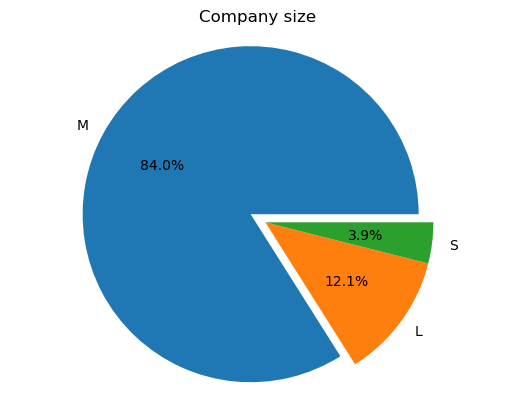

In [281]:
company_numbers = [3153, 454, 148]
company_size = ["M", "L", "S"]
explode = [0.1, 0, 0]  
plt.pie(company_numbers, labels=company_size, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Company size")
plt.show()

In [282]:
df["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

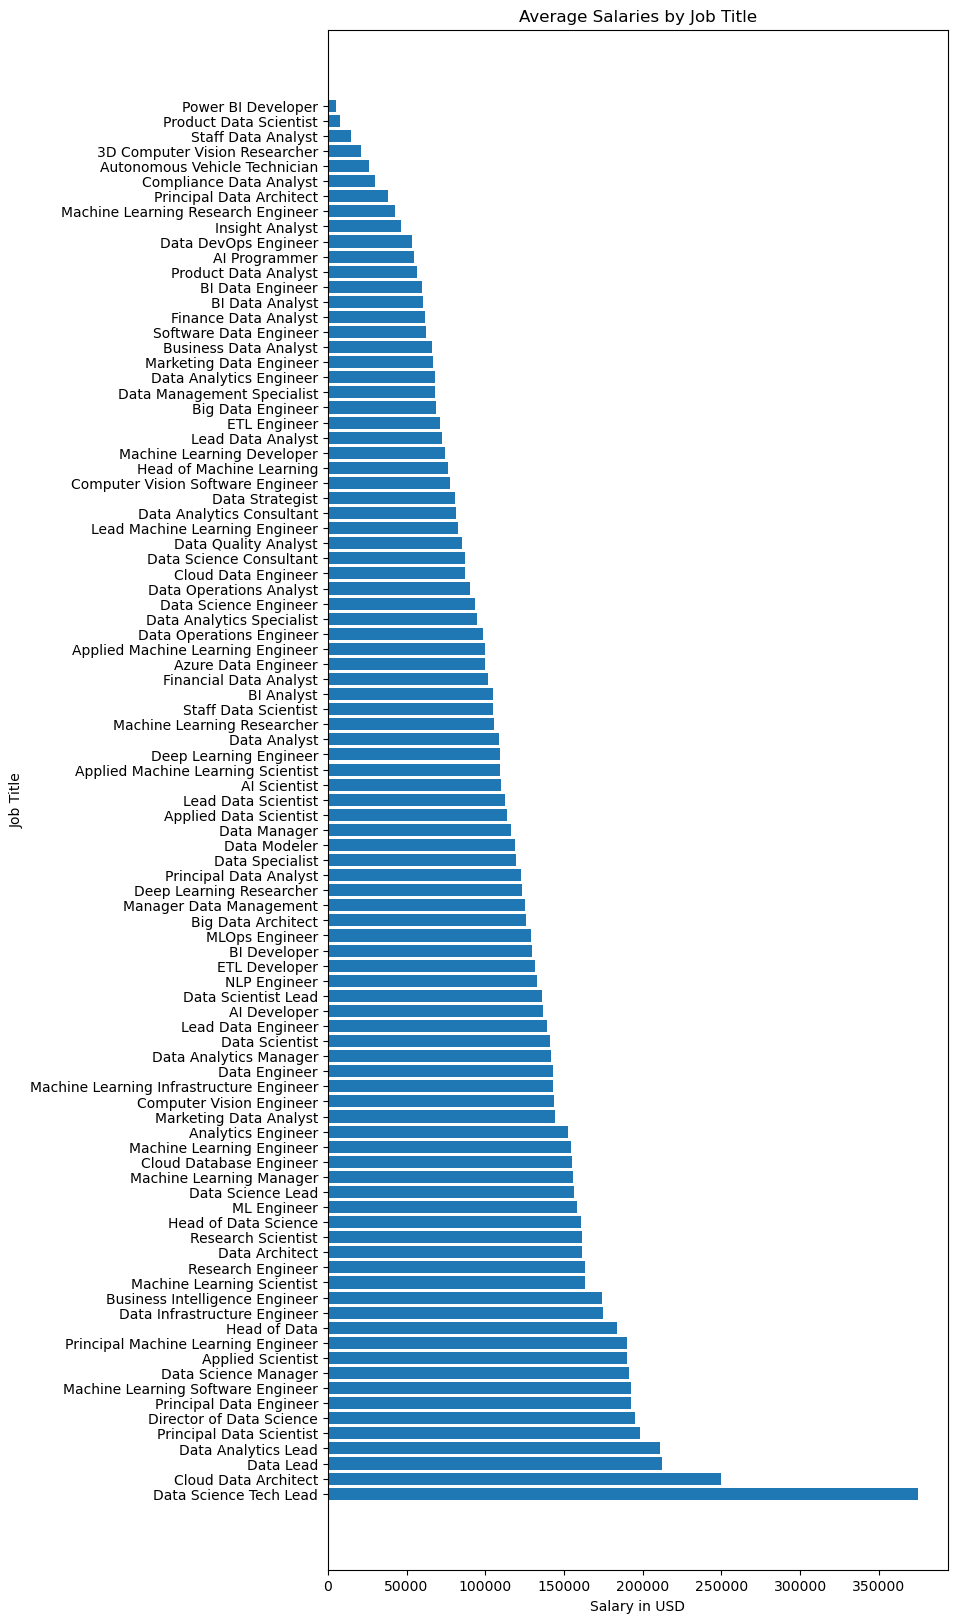

In [283]:
# Calculate mean salaries for each job title
job_title_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

Data science tech lead is having the highest salary followed by cloud Data Architect, whereas Power bi developer is having the least salary.

If compared the count of job designation to its salary top 3 most popular jobs are having medium ranged salary between 150000 to200000

In [284]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


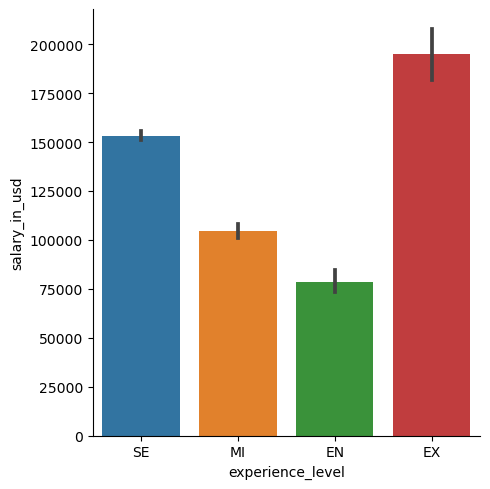

In [285]:
sns.catplot(x="experience_level",y="salary_in_usd" ,kind="bar",data=df)   
plt.show()

There are 4 categorical values in the column "employment_type", such as:

FT, which is Full-time.
PT, which is Part-time.
CT, which is Contractual.
FL, which is Freelancer.

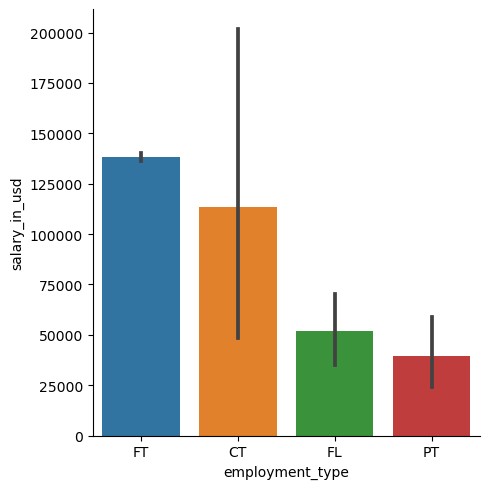

In [286]:
sns.catplot(x="employment_type",y="salary_in_usd" ,kind="bar",data=df)   
plt.show()

Full time employees have largest salary followed by contractual employee and part time employees have leat salary

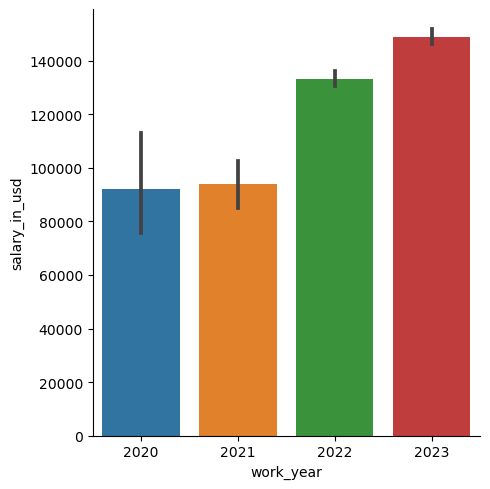

In [287]:
sns.catplot(x="work_year",y="salary_in_usd" ,kind="bar",data=df)   
plt.show()

 salary for all the job designations seems to be increasing from 2020 to 2023 which shows that demand for this jobs are relatively high with increasing salary

In [288]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


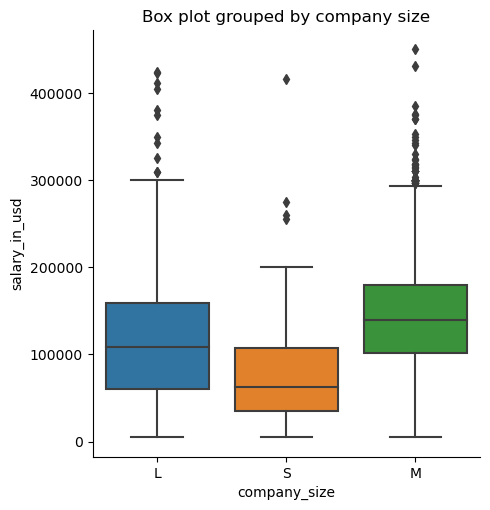

In [289]:
sns.catplot(x="company_size",y="salary_in_usd",kind="box",data=df)   
plt.title("Box plot grouped by company size")
plt.show()

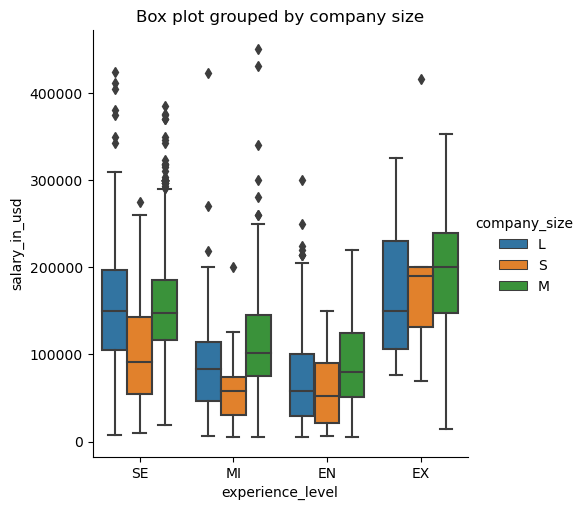

In [290]:
sns.catplot(x="experience_level",y="salary_in_usd",hue="company_size" ,kind="box",data=df)   
plt.title("Box plot grouped by company size")
plt.show()

In [291]:
cat_list=[i for i in df.select_dtypes("object")]

In [292]:
cat_list

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [293]:
for i in cat_list:
    df[i] = df[i].factorize()[0]

In [294]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,80000,0,85847,0,100,0,0
1,2023,1,1,1,30000,1,30000,1,100,1,1
2,2023,1,1,1,25500,1,25500,1,100,1,1
3,2023,0,0,2,175000,1,175000,2,100,2,2
4,2023,0,0,2,120000,1,120000,2,100,2,2
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,0,2,412000,1,412000,1,100,1,0
3751,2021,1,0,0,151000,1,151000,1,100,1,0
3752,2020,2,0,2,105000,1,105000,1,100,1,1
3753,2020,2,1,20,100000,1,100000,1,100,1,0


## Correlation:

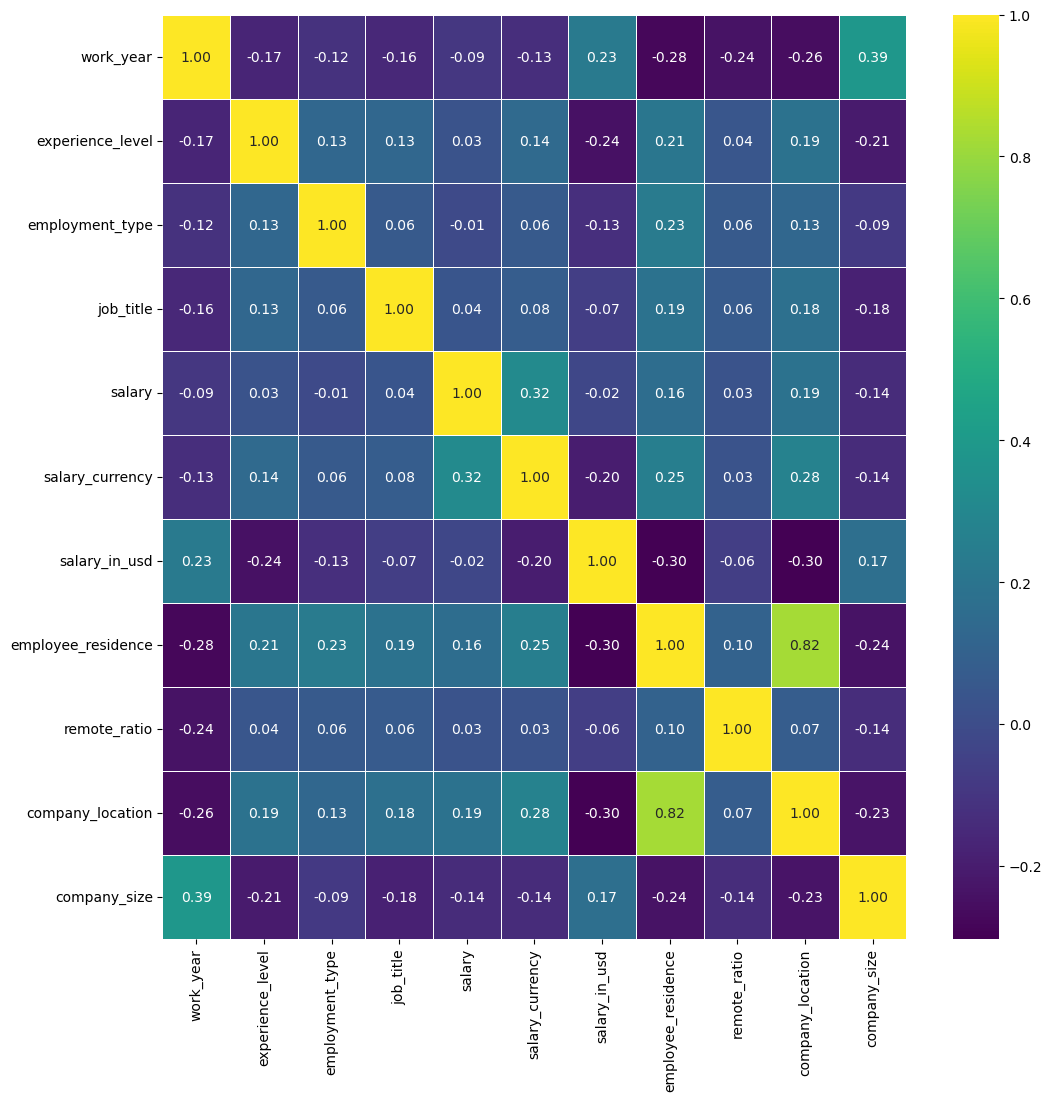

In [295]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,cmap="viridis",fmt=".2f")
plt.show()

In [296]:
X=df.drop(["salary_in_usd"], axis = 1)

In [297]:
Y=df["salary_in_usd"]

## Splitting the Dataset into Train & Test:

In [298]:
# Import library
from sklearn.model_selection import train_test_split

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [300]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3004, 10)
(751, 10)
(3004,)
(751,)


## Modeling

In [301]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR


In [302]:
dt=DecisionTreeRegressor()

In [303]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [304]:
y_predict = dt.predict(X_test)

In [305]:
dt.score(X_train,Y_train)


1.0

In [306]:
dt.score(X_test,Y_test)

0.9953862422582385

In [307]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [308]:
print(r2_score(Y_test, y_predict)*100)
print(mean_squared_error(Y_test, y_predict))
print(mean_absolute_error(Y_test, y_predict))

99.53862422582385
18214145.91611185
704.9680426098536


In [309]:
knn=KNeighborsRegressor().fit(X_train,Y_train)
ada=AdaBoostRegressor().fit(X_train,Y_train)
svm=SVR().fit(X_train,Y_train)
ridge=Ridge().fit(X_train,Y_train)
lasso=Lasso().fit(X_train,Y_train)
rf=RandomForestRegressor().fit(X_train,Y_train)
gbm=GradientBoostingRegressor().fit(X_train,Y_train)

In [310]:
models=[ridge,lasso,knn,ada,svm,rf,gbm]

In [311]:
def ML(Y,models):
    y_pred=models.predict(X_test)
    mse=mean_squared_error(Y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
    r2=r2_score(Y_test,y_pred)*100
    
    return mse,rmse,r2

In [312]:
for i in models:
    print("\n",i,"\n\nDifferent models success rate :",ML("salary_in_usd",i))


 Ridge() 

Different models success rate : (3464466548.9791346, 58859.71923972399, 12.242882894185147)

 Lasso() 

Different models success rate : (3464396847.135084, 58859.12713534821, 12.244648485742848)

 KNeighborsRegressor() 

Different models success rate : (390620185.09517974, 19764.11356714942, 90.10534498091954)

 AdaBoostRegressor() 

Different models success rate : (127655616.54954742, 11298.478505955898, 96.76640292744212)

 SVR() 

Different models success rate : (3944880838.892905, 62808.28638717112, 0.07368671254132098)

 RandomForestRegressor() 

Different models success rate : (31487751.827053532, 5611.394820100751, 99.20239543796437)

 GradientBoostingRegressor() 

Different models success rate : (16579232.720681269, 4071.7603957847605, 99.58003760555226)


#### Based on the provided evaluation metrics, the models can be ranked from best to worst performance as follows:  GradientBoostingRegressor > Random Forest Regressor > Decision Tree Regressor > AdaBoostRegressor > KNeighborsRegressor  .